# Intro ML
## Lab 1 - Clustering with K-means and DBSCAN

_By Kevin Michalewicz_

In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### The Ruspini dataset

In [12]:
df = pd.read_csv("ruspini.csv", sep=",", index_col=[0])

In [33]:
df

,x,y
1,4,53
2,5,63
3,10,59
4,9,77
5,13,49
...,...,...
71,66,23
72,61,25
73,76,27
74,72,31


In [14]:
df.describe()

,x,y
count,75.00000,75.000000
mean,54.88000,92.026667
std,30.50253,48.702620
min,4.00000,4.000000
25%,31.50000,56.500000
50%,52.00000,96.000000
75%,76.50000,141.500000
max,117.00000,156.000000


The datasets consists of 75 (x,y) samples. The mean for the 'x' coordinate is 54.88 and for the 'y' coordinate, about 92.03. 

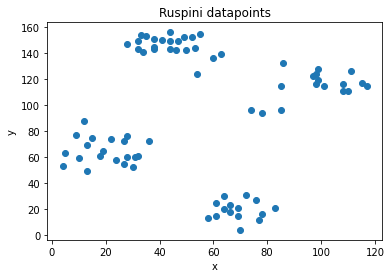

In [15]:
plt.scatter(df['x'].values, df['y'].values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ruspini datapoints')
plt.show()

K-means can be applied because there are convex, isotropic clusters with similar geometries. Four of them can be identified. So in the following section we are going to asume the number of clusters as a known quantity (K=4).

### K-means algorithm

In [16]:
# Initialization (unseeded version)

k = 4 # number of clusters
x_limit = 120
y_limit = 160
iterations = 5
cluster_colors = {1: 'r', 2: 'g', 3: 'b', 4: 'k'} # one for each cluster

centroids = {
    i+1: [np.random.randint(0, x_limit), np.random.randint(0, y_limit)] for i in range(k)
}

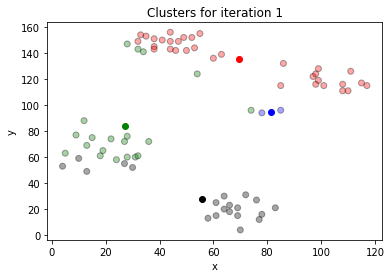

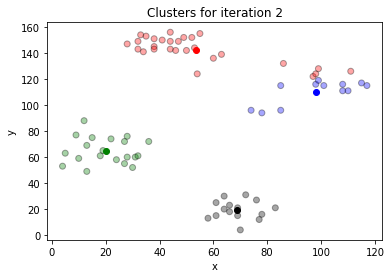

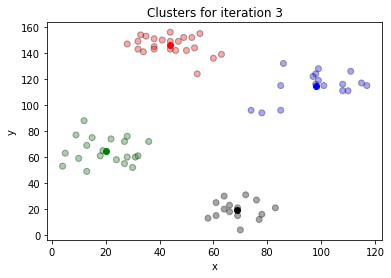

In [17]:
error_threshold = 1000
e = 2*error_threshold
l = 0

while e > error_threshold:
    # Cluster assignment step

    for i in centroids.keys():
        df['distance_{}'.format(i)] = np.sqrt((df['x'] - centroids[i][0]) ** 2 + (df['y'] - centroids[i][1]) ** 2)
    df['cluster'] = df.loc[:, ['distance_{}'.format(i) for i in centroids.keys()]].idxmin(axis=1)
    df['cluster'] = df['cluster'].map(lambda x: int(x.lstrip('distance_'))) # removing distance and casting to int
    df['color'] = df['cluster'].map(lambda x: cluster_colors[x]) # mapping the cluster colors
    df['error'] = df.loc[:, ['distance_{}'.format(i) for i in centroids.keys()]].min(axis=1)
    e = sum(df['error'])
    l = l + 1
    
    # Centroid estimation step

    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['cluster'] == i]['x']) # empirical mean for 'x'
        centroids[i][1] = np.mean(df[df['cluster'] == i]['y']) # empirical mean for 'y'
    
    # Plotting for this iteration
    
    fig = plt.figure()
    ax = plt.axes()
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.35, edgecolor='k')
    
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=cluster_colors[i])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Clusters for iteration {}'.format(l))
    plt.show()

In [18]:
df

,x,y,distance_1,distance_2,distance_3,distance_4,cluster,color,error
1,4,53,102.359722,20.090421,110.117519,73.111543,2,g,20.090421
2,5,63,93.212575,15.274980,104.388065,77.384954,2,g,15.274980
3,10,59,94.232683,11.765415,101.896359,71.002097,2,g,11.765415
4,9,77,79.276270,16.417217,95.106264,83.124993,2,g,16.417217
5,13,49,101.969946,17.479273,104.807131,63.282681,2,g,17.479273
...,...,...,...,...,...,...,...,...,...
71,66,23,120.176412,62.145193,92.834268,4.643753,4,k,4.643753
72,61,25,117.767986,57.137772,92.846835,9.710704,4,k,9.710704
73,76,27,117.685774,67.523514,85.989542,10.377754,4,k,10.377754
74,72,31,113.042084,61.976003,83.299868,11.998518,4,k,11.998518


After running the K-means algorithm several times it can be said that the obtained clusters strongly depend on the centroids initial conditions.

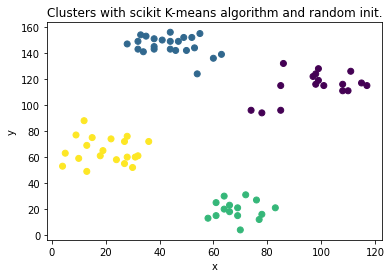

In [19]:
df = df.loc[:,'x':'y'] # Original dataset

kmeans = KMeans(n_clusters=k, init='random')
ruspini_prediction = kmeans.fit_predict(df)
plt.figure()
plt.title('Clusters with scikit K-means algorithm and random init.')
plt.scatter(df['x'].values, df['y'].values, c=ruspini_prediction)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

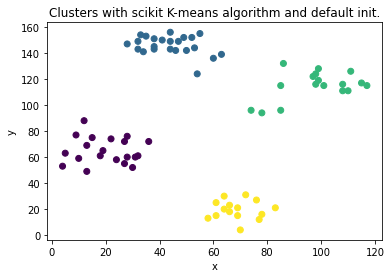

In [20]:
kmeans = KMeans(n_clusters=k) # k-means++ is default initialization
ruspini_prediction = kmeans.fit_predict(df)
plt.figure()
plt.title('Clusters with scikit K-means algorithm and default init.')
plt.scatter(df['x'].values, df['y'].values, c=ruspini_prediction)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

When using different initializations, the results remain the same (in every case for K=4 clusters).

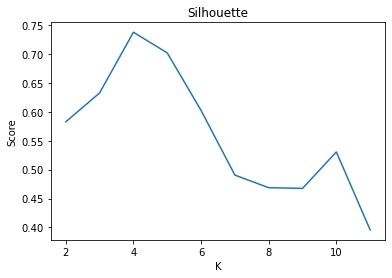

In [21]:
silhouette = []
x = range(2, 12)
for k in x:
    kmeans = KMeans(n_clusters=k)
    ruspini_prediction = kmeans.fit_predict(df)
    silhouette.append(silhouette_score(df, ruspini_prediction))
    
plt.figure()
plt.title('Silhouette')

plt.plot(x, silhouette)
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [22]:
silhouette.insert(0,0) # zero clusters
silhouette.insert(0,0) # one cluster
max(enumerate(silhouette), key=lambda x: x[1])

(4, 0.7376569908806615)

The Silhouette is maximized with K=4 clusters. That means that our previous assumptions were accurate ones.

### DBSCAN algorithm

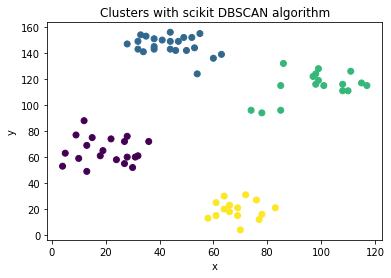

In [23]:
dbscan = DBSCAN(eps=20, min_samples=4) # epsilon and N_min are the parameters
ruspini_prediction = dbscan.fit_predict(df)
plt.figure()
plt.title('Clusters with scikit DBSCAN algorithm')
plt.scatter(df['x'].values, df['y'].values, c=ruspini_prediction)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

If $\epsilon$ is too small or too big (greater than 44 or lower than 5, in this case), then only one cluster is obtained. The same happens if the minimum number of samples is too big. However, there is a range of $N_{min}$ - for each $\epsilon$ - where more clusters than four can be found.

### The IRIS dataset

In [24]:
data = load_iris()

In [32]:
features = list(data.feature_names)
labels = list(data.target_names)

features, labels

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 ['setosa', 'versicolor', 'virginica'])

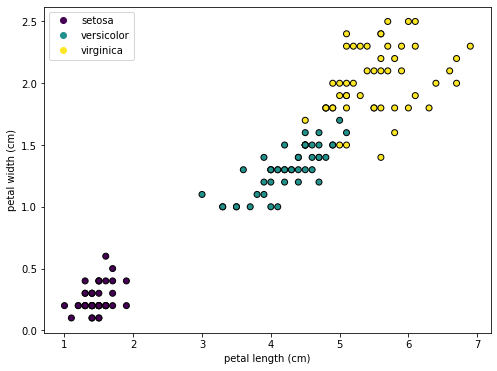

In [31]:
X = data.data[:, 2:]  # we only take the last two features.
y = data.target

plt.figure(2, figsize=(8, 6))
# Plot the training points
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(y.min(), y.max())
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis', norm=norm)
handles = [plt.Line2D([0, 0], [0, 0], color=cmap(norm(i)), marker='o', linestyle='', label=label)
           for i, label in enumerate(labels)]
plt.legend(handles=handles)
plt.xlabel('{}'.format(features[-2]))
plt.ylabel('{}'.format(features[-1]))
plt.show()

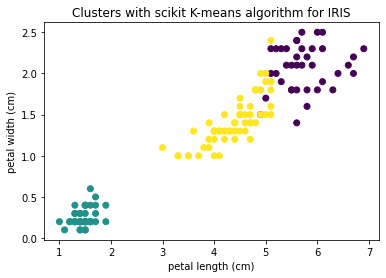

In [27]:
k = 3

kmeans = KMeans(n_clusters=k) # k-means++ is default initialization
iris_prediction = kmeans.fit_predict(data.data)
plt.figure()
plt.title('Clusters with scikit K-means algorithm for IRIS')
plt.scatter(data.data[:, 2], data.data[:, 3], c=iris_prediction)
plt.xlabel('{}'.format(features[-2]))
plt.ylabel('{}'.format(features[-1]))
plt.show()

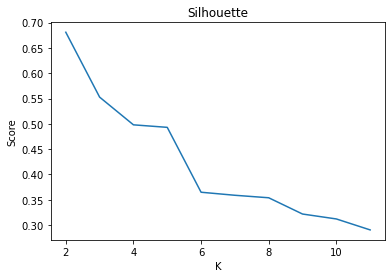

In [28]:
silhouette = []
x = range(2, 12)
for k in x:
    kmeans = KMeans(n_clusters=k)
    iris_prediction = kmeans.fit_predict(data.data)
    silhouette.append(silhouette_score(data.data, iris_prediction))
    
plt.figure()
plt.title('Silhouette')

plt.plot(x, silhouette)
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [29]:
silhouette.insert(0,0) # zero clusters
silhouette.insert(0,0) # one cluster
max(enumerate(silhouette), key=lambda x: x[1])

(2, 0.681046169211746)

The IRIS dataset consists of 3 species of flowers, which contradicts the Silhouette (that outputs 2 as the optimal number of clusters). So in this particular case we would still consider K=3 as the optimal value.